In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock = pd.read_csv('../resources/ac.csv', index_col='time')
stock.head()

,open,low,close,volume
time,,,,
2014-01-02T08:00:00+08:00,520.0,519.0,525.5,367200.0
2014-01-03T08:00:00+08:00,521.0,514.0,520.5,552230.0
2014-01-06T08:00:00+08:00,525.0,519.0,525.5,399380.0
2014-01-07T08:00:00+08:00,529.5,523.0,524.0,197230.0
2014-01-08T08:00:00+08:00,524.0,524.0,530.5,558440.0


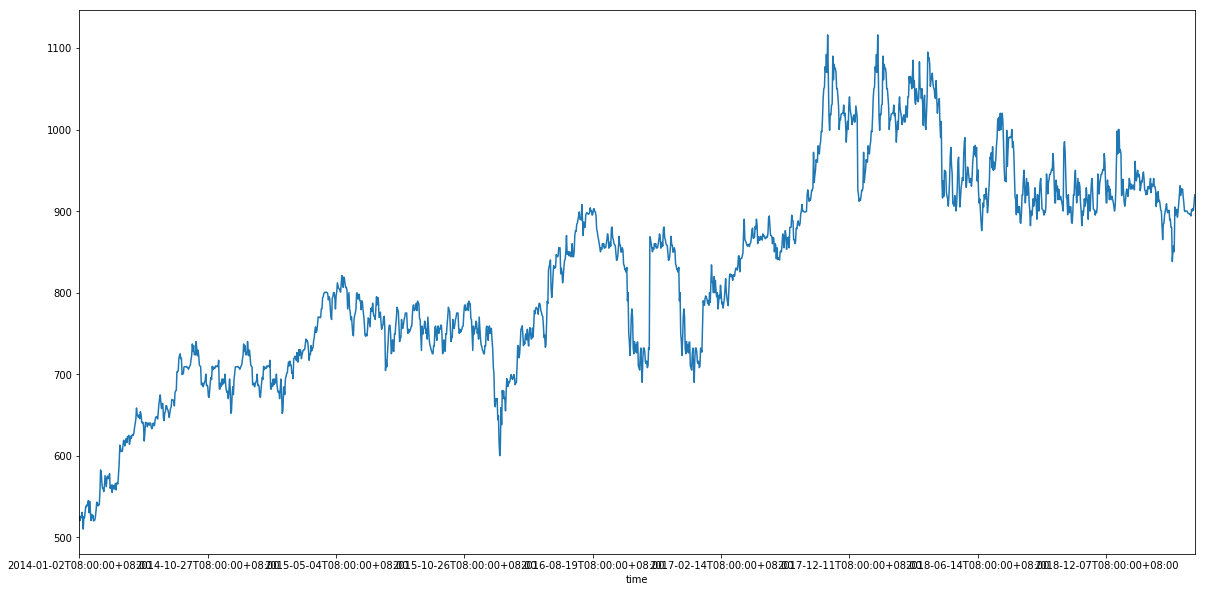

In [3]:
stock['close'].plot(figsize=(20, 10))

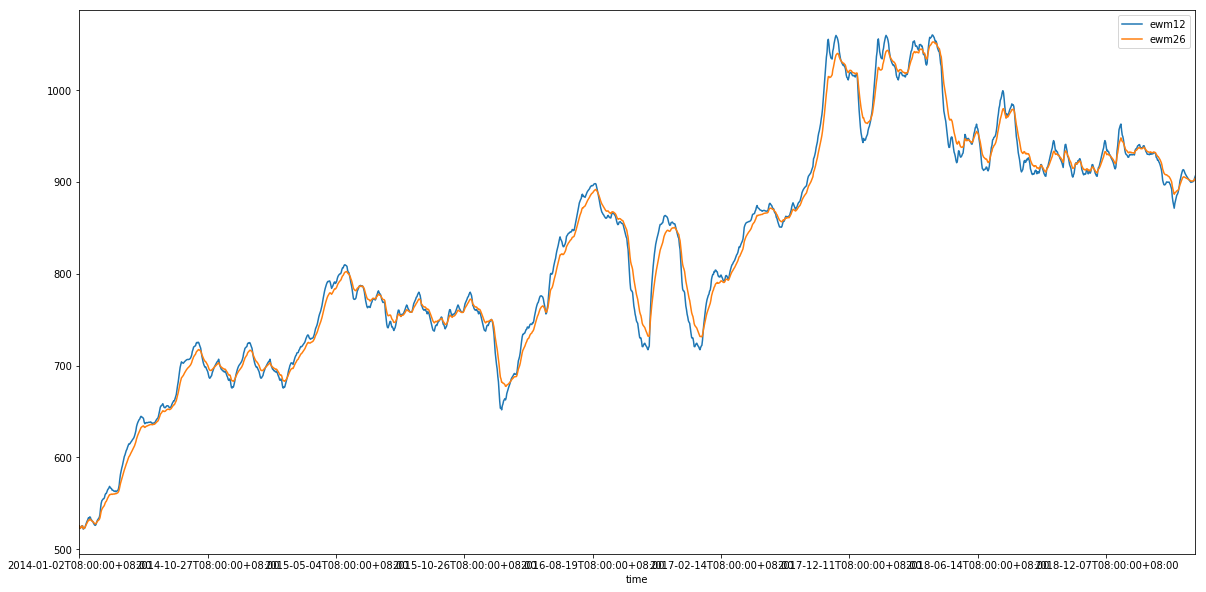

In [4]:
stock['ewm12'] = stock['close'].ewm(span=12).mean()
stock['ewm26'] = stock['close'].ewm(span=26).mean()
stock[['ewm12', 'ewm26']].plot(figsize=(20, 10))

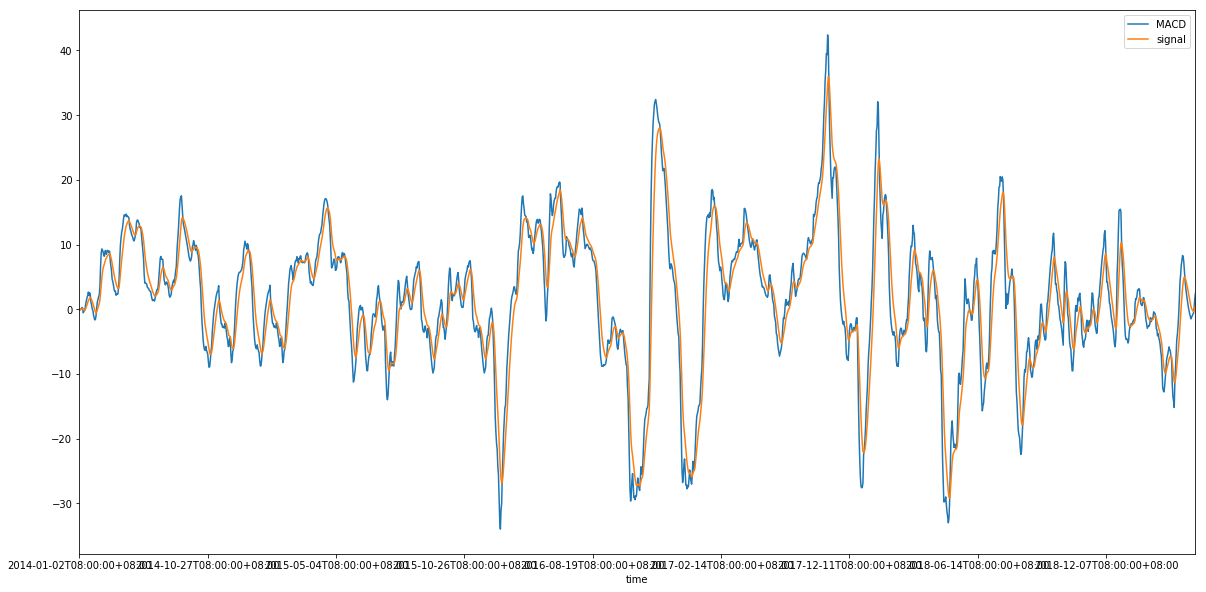

In [5]:
stock['MACD'] = stock['ewm12'] - stock['ewm26']
stock['signal'] = stock['MACD'].ewm(span=9).mean()
stock[['MACD', 'signal']].plot(figsize=(20, 10))

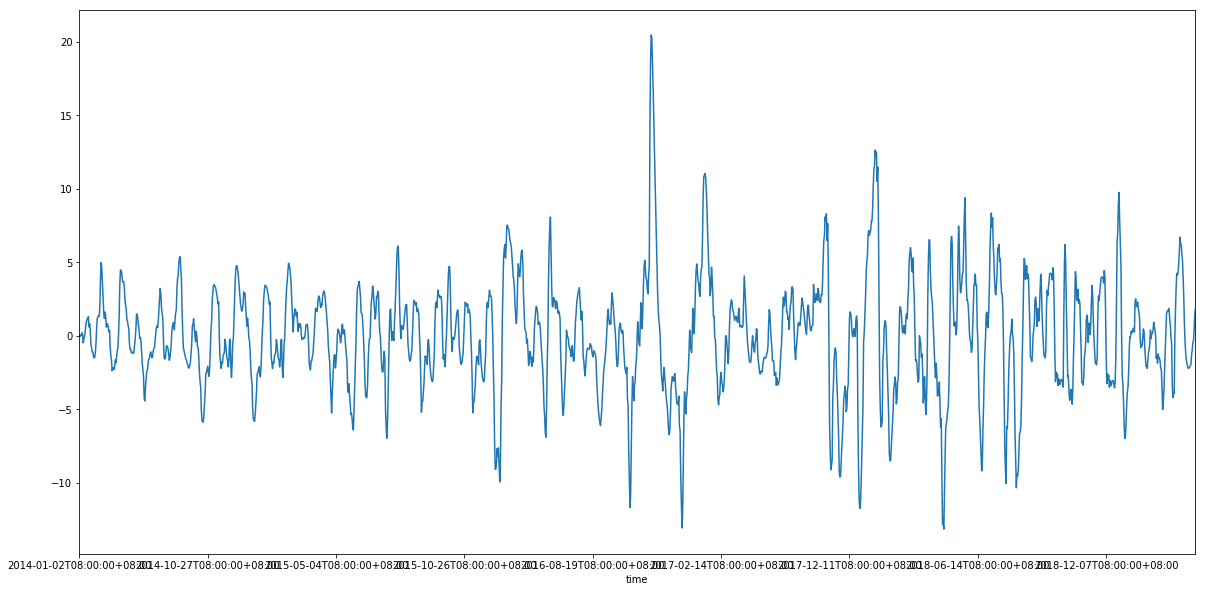

In [6]:
(stock['MACD'] - stock['signal']).plot(figsize=(20, 10))